In [23]:
import matplotlib.pyplot as plt
import re
import os
import sys
# os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Weak SDE approximation/C++/underdamped")

import numpy as np
from scipy.stats import norm
# from settings_and_potential import *
font_size=25
lw=4

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 
# nrank = sys.argv[0]
range_bins=[-3,3]
tau=0.1
s=1

In [24]:
import matplotlib.pyplot as plt
import sys
sys.path.append("Python/accuracy/accuracy_1dim")

## Import the package to run the samples 
from settings import *
from useful_tools import *
from accuracy_over_func import *

global T
global gamma
global tau
global h
global n_samples
global Nt

In [16]:
## with parameters
m=0.001
M=1.5
pot="spring"
a=10
b=0.1
x0=0.5
c=0.1

# # ## for precise results on accuracy curves 
dt_list= [0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6]
# dt_list= [0.0007,0.0009,0.001,0.003,0.005,0.007,0.009,0.01,0.03,0.05,0.07,0.09,0.1,0.3,0.5]

T=100 #0
tau=0.1
n_samples=10000000
h=0.05
Nt= int(T*1/h)+1
x=0
range_bins=[-1,1] # range to plot samples on histograms
nbins=50
range_int=[-10,10] # integration range 

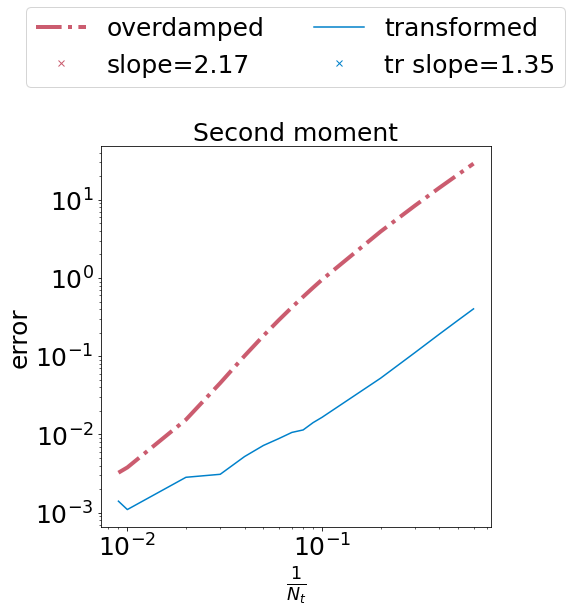

In [22]:

# List of parameters 
list_param = str(pot)+'-tau='+str(tau)+'-M='+str(M)+'m='+str(m)+"-T="+str(T)+"-ns="+str(n_samples)

dta_noada=pd.read_pickle("Python/accuracy/accuracy_1dim/saved_pickles_over/dta_noada_"+list_param)
dta_transfo=pd.read_pickle("Python/accuracy/accuracy_1dim/saved_pickles_over/dta_tr_"+list_param)
# does not consider the rescale for the accuracy computation
# dta_rescale=pd.read_pickle("Python/accuracy/accuracy_1dim/saved_pickles_over/dta_re_"+list_param)



# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax2)= plt.subplots(1,1,figsize=(7,7))# plt.figure(figsize=(4,4))
# ax1.set_title("First moment",fontsize=font_size)
ax2.set_title("Second moment",fontsize=font_size)
# ax3.set_title("Third moment")
# ax4.set_title("Fourth moment")

lab="overdamped"
mom1_list,mom2_list,mom3_list,mom4_list,mom_1_plussd,mom_2_plussd,mom_3_plussd,mom_4_plussd=moment_list(dt_list,tau,dta_noada,range_int)
# ax1.loglog(dt_list,mom1_list,"-.",linewidth=lw,label=lab,color=myred)
ax2.loglog(dt_list,mom2_list,"-.",linewidth=lw,label=lab,color=myred)


# Compute the slope 
###################
# x,y_x,a_round=get_slope(mom1_list,dt_list)
# ax1.loglog(x,y_x,"x",label="slope="+str(a_round),color=myred)

x,y_x,a_round=get_slope(mom2_list,dt_list)
ax2.loglog(x,y_x,"x",label="slope="+str(a_round),color=myred)


lab="transformed"
mom1_list,mom2_listtr,mom3_list,mom4_list,mom_1_plussd,mom_2_plussd,mom_3_plussd,mom_4_plussd=moment_list(dt_list,tau,dta_transfo,range_int)
# ax1.loglog(dt_list,mom1_list,label=lab,color=myblue)
ax2.loglog(dt_list,mom2_listtr,label=lab,color=myblue)



# Compute the slope 
###################
# x,y_x,a_round=get_slope(mom1_list,dt_list)
# ax1.plot(x,y_x,"x",label="tr slope="+str(a_round),color=myblue)

x,y_x,a_round=get_slope(mom2_listtr,dt_list)
ax2.plot(x,y_x,"x",label="tr slope="+str(a_round),color=myblue)

# ax1.set_xlabel("$\frac{1}{N_t}$",fontsize=font_size)
ax2.set_xlabel("$\\frac{1}{N_t}$",fontsize=font_size)

# ax1.set_ylabel("error",fontsize=font_size)
ax2.set_ylabel("error",fontsize=font_size)


# ax1.legend(fontsize=font_size)
ax2.legend(fontsize=font_size, loc="upper center",ncol=2,bbox_to_anchor=(0.5, 1.4))
plt.show()
# fig.savefig('Python/accuracy/accuracy_1dim/saved_figures/'+pot+'/moments_logplot_'+str(pot)+'.png')



In [27]:
# with parameters
m=0.001
M=1.5
pot="spring"
a=1
b=1
x0=0.5
c=0.1
dt_list= [0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6]
T=100
tau=0.1
n_samples=5000123
x=0
range_bins=[-10,10] # range to plot samples on histograms
nbins=50
range_int=[-10,10] # integration range

In [28]:
def U(x):
        res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
        return res

In [32]:
def moment_list(dt_list,tau,dta_noada,range_int):
    ####################################################
    ## Obtain the error on the moments
    ####################################################

    mom1_list=[]
    mom2_list=[]
    mom3_list=[]
    mom4_list=[]

    mom_1_plussd=[]
    mom_2_plussd=[]
    mom_3_plussd=[]
    mom_4_plussd=[]


    ## When no access to the true moment
    a=range_int[0]
    b=range_int[1]
    norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), a,b)[0],16)
    true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), a,b)[0],16)/norm
    true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, a,b)[0],16)/norm
    true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, a,b)[0],16)/norm
    true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, a,b)[0],16)/norm

    # print("true moment 1:\n")
    # print(true_mom_1)
    for j in range(len(dt_list)):

        x = dta_noada["x"+str(j)]

        # compute first moment
        mom_1 =np.sum((x))/len(x)
        mom_1=np.abs(mom_1-true_mom_1)
        mom_sd_1=np.std(np.abs(x))/np.sqrt(len(x))*1.96 #(Z for alpha 0.05)
        mom1_list.append(mom_1)
        mom_1_plussd.append(mom_1+mom_sd_1)

        #compute second moment
        mom_2 = np.sum(np.power(np.abs(x),2))/len(x)
        mom_2 = np.abs(mom_2-true_mom_2)
        mom_sd_2=np.std(np.power(np.abs(x),2))/np.sqrt(len(x))*1.96 #(Z for alpha 0.05)
        mom2_list.append(mom_2)
        mom_2_plussd.append(mom_2+mom_sd_2)

        # compute third moment
        mom_3 = np.sum(np.power((x),3))/len(x)
        mom_3=np.abs(mom_3-true_mom_3)
        mom_sd_3=np.std(np.power(np.abs(x),3))/np.sqrt(len(x))*1.96 #(Z for alpha 0.05)
        mom3_list.append(mom_3)
        mom_3_plussd.append(mom_3+mom_sd_3)

        # compute fourth moment 
        mom_4 = np.sum(np.power(np.abs(x),4))/len(x)
        mom_4=np.abs(mom_4-true_mom_4)
        mom_sd_4=np.std(np.power(np.abs(x),4))/np.sqrt(len(x))*1.96 #(Z for alpha 0.05)
        mom4_list.append(mom_4)
        mom_4_plussd.append(mom_4+mom_sd_4)

    return(mom1_list,mom2_list,mom3_list,mom4_list,mom_1_plussd,mom_2_plussd,mom_3_plussd,mom_4_plussd)


def get_slope(accuracy_list,dt_list):
    #######################################
    ## Obtain the slope of the error decay
    #######################################
    logx1=np.log(dt_list[0])
    logx2=np.log(dt_list[-1])
    logy1=np.log(accuracy_list[0])
    logy2=np.log(accuracy_list[-1])
    a=(logy1-logy2)/(logx1-logx2)
    b=logy1-a*logx1
    x=np.linspace(logx1,logx2,1000)
    y_x=a*x+b
    a_round=np.round(np.abs(a),2)
    return(x,y_x,a_round)

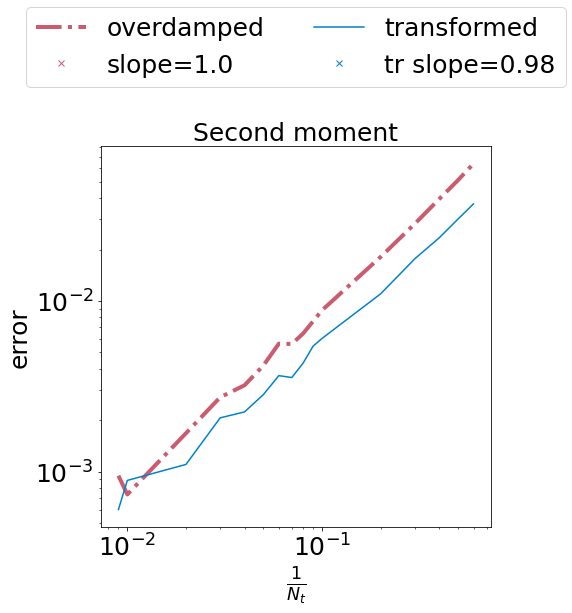

In [33]:

# List of parameters 
list_param = str(pot)+'-tau='+str(tau)+'-M='+str(M)+'m='+str(m)+"-T="+str(T)+"-ns="+str(n_samples)

dta_noada=pd.read_pickle("Python/accuracy/accuracy_1dim/saved_pickles_over/dta_noada_"+list_param)
dta_transfo=pd.read_pickle("Python/accuracy/accuracy_1dim/saved_pickles_over/dta_tr_"+list_param)
# does not consider the rescale for the accuracy computation
# dta_rescale=pd.read_pickle("Python/accuracy/accuracy_1dim/saved_pickles_over/dta_re_"+list_param)



# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax2)= plt.subplots(1,1,figsize=(7,7))# plt.figure(figsize=(4,4))
# ax1.set_title("First moment",fontsize=font_size)
ax2.set_title("Second moment",fontsize=font_size)
# ax3.set_title("Third moment")
# ax4.set_title("Fourth moment")

lab="overdamped"
mom1_list,mom2_list,mom3_list,mom4_list,mom_1_plussd,mom_2_plussd,mom_3_plussd,mom_4_plussd=moment_list(dt_list,tau,dta_noada,range_int)
# ax1.loglog(dt_list,mom1_list,"-.",linewidth=lw,label=lab,color=myred)
ax2.loglog(dt_list,mom2_list,"-.",linewidth=lw,label=lab,color=myred)


# Compute the slope 
###################
# x,y_x,a_round=get_slope(mom1_list,dt_list)
# ax1.loglog(x,y_x,"x",label="slope="+str(a_round),color=myred)

x,y_x,a_round=get_slope(mom2_list,dt_list)
ax2.loglog(x,y_x,"x",label="slope="+str(a_round),color=myred)


lab="transformed"
mom1_list,mom2_listtr,mom3_list,mom4_list,mom_1_plussd,mom_2_plussd,mom_3_plussd,mom_4_plussd=moment_list(dt_list,tau,dta_transfo,range_int)
# ax1.loglog(dt_list,mom1_list,label=lab,color=myblue)
ax2.loglog(dt_list,mom2_listtr,label=lab,color=myblue)



# Compute the slope 
###################
# x,y_x,a_round=get_slope(mom1_list,dt_list)
# ax1.plot(x,y_x,"x",label="tr slope="+str(a_round),color=myblue)

x,y_x,a_round=get_slope(mom2_listtr,dt_list)
ax2.plot(x,y_x,"x",label="tr slope="+str(a_round),color=myblue)

# ax1.set_xlabel("$\frac{1}{N_t}$",fontsize=font_size)
ax2.set_xlabel("$\\frac{1}{N_t}$",fontsize=font_size)

# ax1.set_ylabel("error",fontsize=font_size)
ax2.set_ylabel("error",fontsize=font_size)


# ax1.legend(fontsize=font_size)
ax2.legend(fontsize=font_size, loc="upper center",ncol=2,bbox_to_anchor=(0.5, 1.4))

plt.show()
# fig.savefig('Python/accuracy/accuracy_1dim/saved_figures/'+pot+'/moments_logplot_'+str(pot)+'.png')

